In [61]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = '/Users/hsieh/easySC/result/result.h5ad'  # the file that will store the analysis results

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 pynndescent==0.5.7


In [32]:
adata = sc.read_10x_mtx(
    '/Users/hsieh/easySC/test_10X/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  
adata.var_names_make_unique()
adata

... reading from cache file cache/Users-hsieh-easySC-test_10X-matrix.h5ad


AnnData object with n_obs × n_vars = 6794880 × 36601
    var: 'gene_ids', 'feature_types'

In [33]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6781987 cells that have less than 200 genes expressed
filtered out 13339 genes that are detected in less than 3 cells


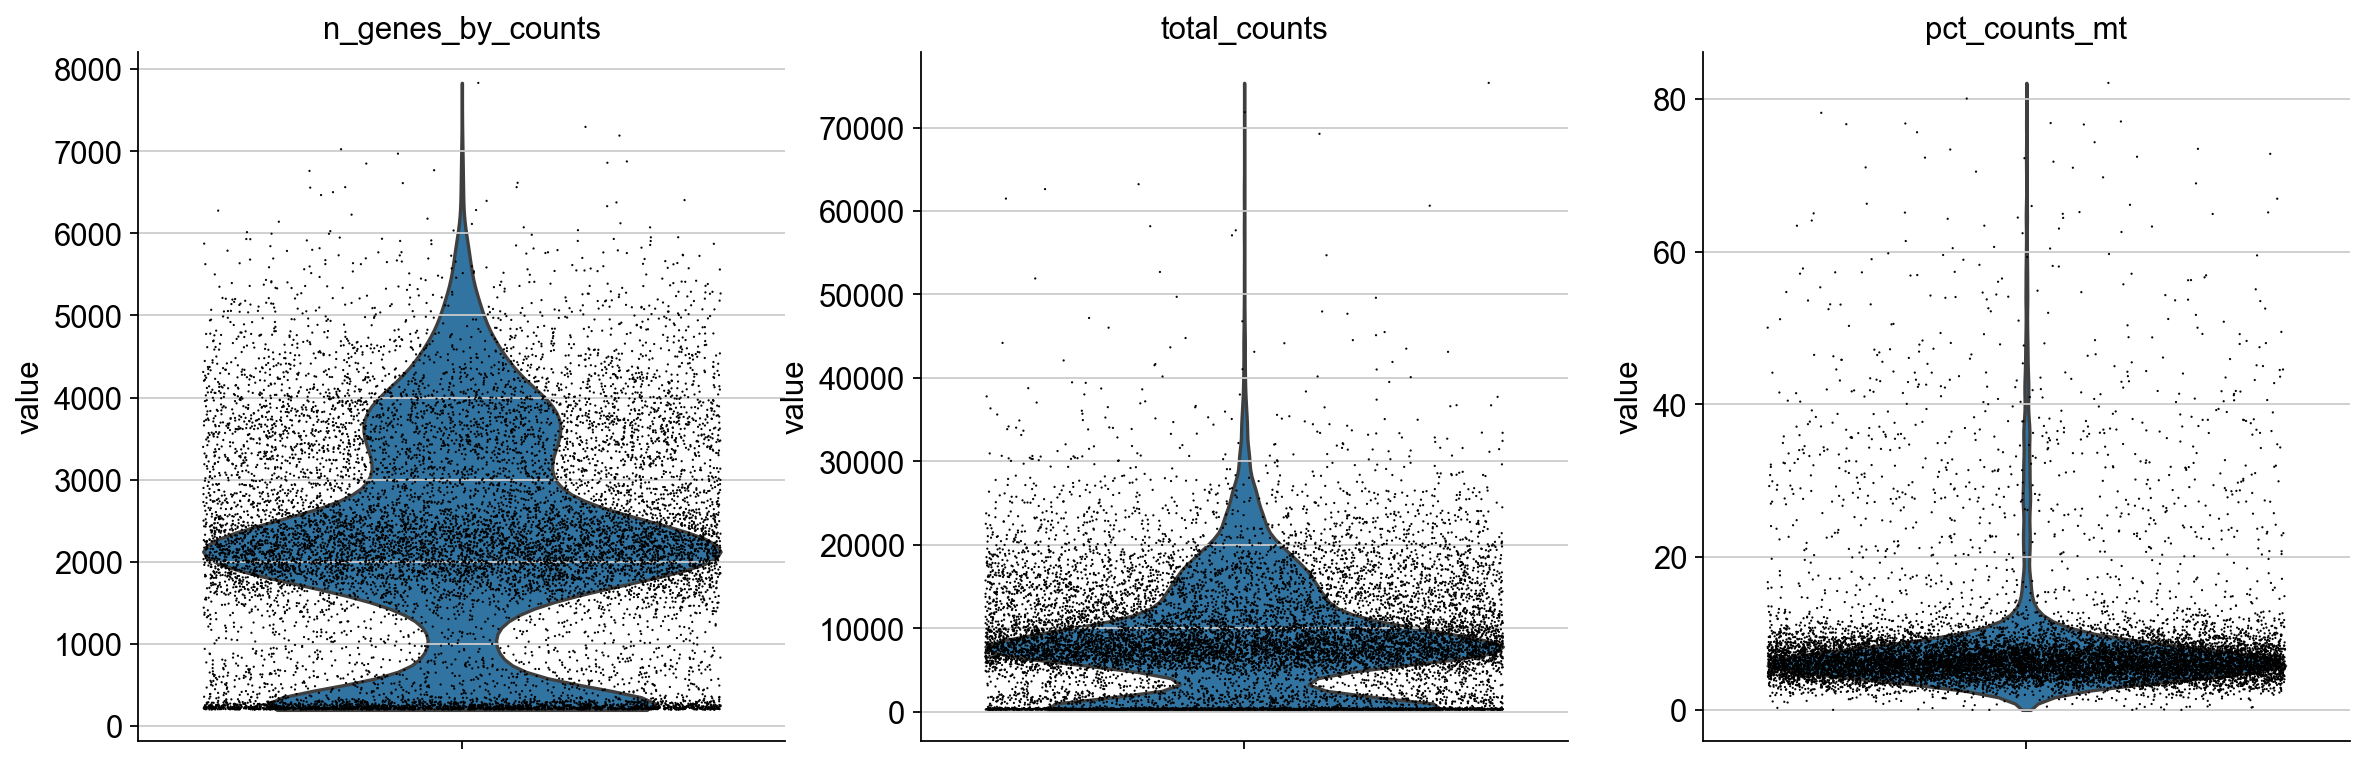

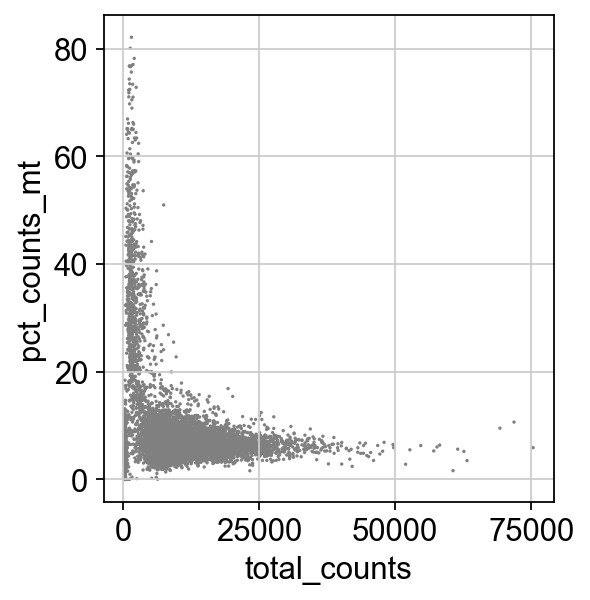

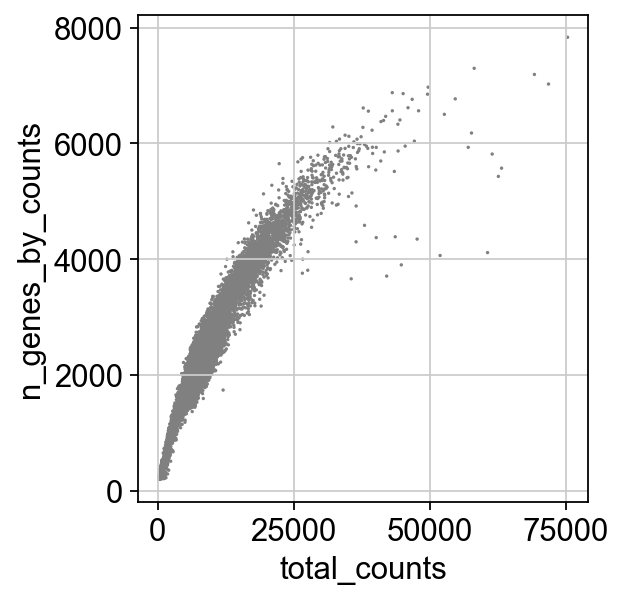

In [78]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,save="_basicQC.png")
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',save="_mtQC.png")
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',save="_geneQC.png")

In [56]:
# get basic profiling
df_obs= pd.DataFrame(adata.obs)
df.var = pd.DataFrame(adata.var)

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAGTATATGGA-1,344,343,886.0,399.0,45.033859
AAACCCAGTATCGTAC-1,749,749,1628.0,7.0,0.429975
AAACCCAGTCGGTGAA-1,1868,1867,6590.0,679.0,10.303490
AAACCCAGTTAGAAAC-1,3809,3809,17318.0,951.0,5.491396
AAACCCAGTTATCTTC-1,1517,1516,3526.0,476.0,13.499716
